# Global Mart Superstore Assignment

### By Prateek Rana

## Objective: 
To Forecast the sales of the profits of the store for the next 6 months.

## Business Problem
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.
 
As a sales manager for this store, I have to forecast the sales of the products for the next 6 months, so that I have a proper estimate and can plan my inventory and business processes accordingly.

## Problem Statement

The store has 7 geographical markets and 3 segments. We need to find the most consistently profitable market-segment and forecast the sales and demand for that market-segment. We can do that by calculating the "Coefficient of Variation (CoV)" and select the market-segment with the highest CoV. After acquiring the most consistently profitable market-segment, we must forecast the profit for the next 6 months. We must choose the right time series forecasting model according to the possible trends and seasonality.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read dataset
data = pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
#Convert Order Date into datetime format
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [4]:
# Creating a column as MarketSegment
data['MarketSegment'] = data.Market + '-' + data.Segment
data.head()

,Order Date,Segment,Market,Sales,Profit,MarketSegment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [5]:
#Create Pivot Table with aggfunc = sum
dataag = data.pivot_table(index = 'Order Date', columns = 'MarketSegment', values = 'Profit', aggfunc='sum')
dataag.head()

MarketSegment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [6]:
# Train Test Split

train_len = 42
train_dataag = dataag[:train_len]
test_dataag = dataag[train_len:]

## Calculation of CoV

In [7]:
#Create CoV dataframe
cov = pd.DataFrame(columns = ['MS', 'cov'])

In [8]:
#Calculating CoV
for i in train_dataag.columns:
    temp = {'MS' : i, 'cov': np.std(train_dataag[i])/np.mean(train_dataag[i])}
    cov = cov.append(temp, ignore_index = True)

In [9]:
#Sorting Values
cov.sort_values(by='cov')

,MS,cov
0,APAC-Consumer,0.522725
1,APAC-Corporate,0.530051
12,EU-Consumer,0.595215
15,LATAM-Consumer,0.683770
13,EU-Corporate,0.722076
16,LATAM-Corporate,0.882177
14,EU-Home Office,0.938072
2,APAC-Home Office,1.008219
18,US-Consumer,1.010530
19,US-Corporate,1.071829


> Thus, we take APAC-Consumer with 0.522725 CoV value as the market segment to be considered for forecasting profits. This market segment is the most consistently profitable market segment.

In [10]:
#Choosing rows with APAC-Consumer only
data2 = data[data['MarketSegment'] == 'APAC-Consumer']
data2.head()

,Order Date,Segment,Market,Sales,Profit,MarketSegment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC-Consumer
6,2011-07,Consumer,APAC,1822.080,564.840,APAC-Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC-Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC-Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC-Consumer


In [11]:
#Selecting only order date and profit
data2 = data2[['Order Date', 'Sales']]
data2.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [12]:
#Aggregating data to find sum of sales
data2 = data2.groupby(['Order Date']).sum()
data2.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [13]:
#Format order date column to timestamp
data2 = data2.to_timestamp()

In [14]:
#Train test split
train_len = 42
train = data2[:train_len]
test = data2[train_len:]

## Time Series Analysis

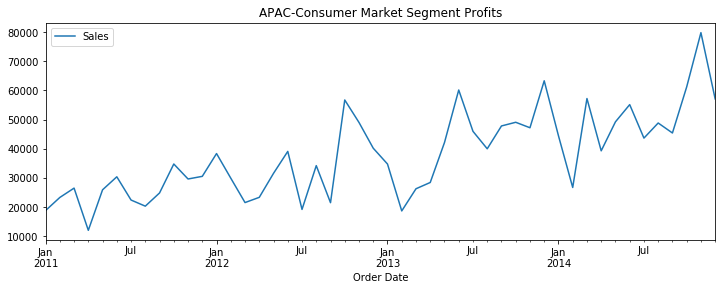

In [15]:
#Plotting time series data
data2.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('APAC-Consumer Market Segment Profits')
plt.show()

## Time Series Decomposition

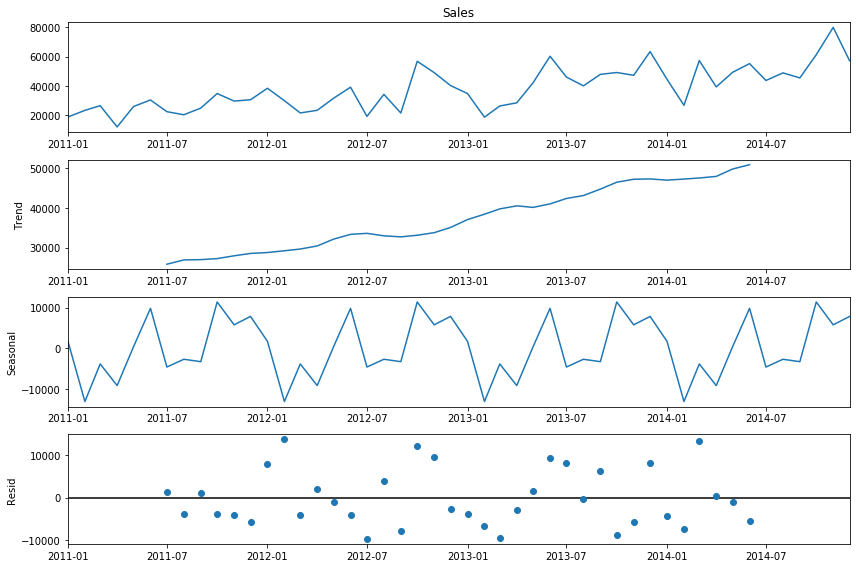

In [16]:
#Additive seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data2.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

> I have used additive seasonal decomposition as in the time series plot I saw that the seasonal peaks almost remained the same height.

> From the additive seasonal decomposition plots, we get to know that there is a clear trend in the data. In seasonal, we can see that there is a great rise after July every year.

# Time Series Forecast

## Exponential Smoothing Methods

## Simple Exponential Smoothing

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

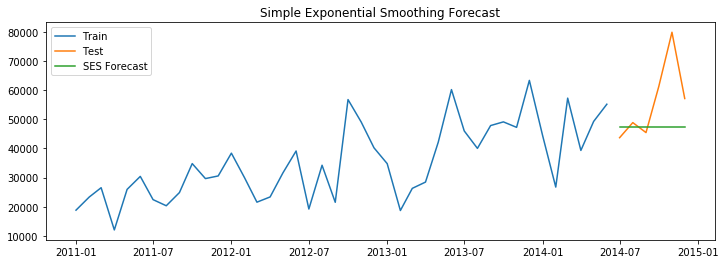

In [18]:
# Plotting train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train.Sales, label = 'Train')
plt.plot(test.Sales, label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'SES Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast')
plt.show()

In the plot we can see that the forecast is a straight line, it does not capture the peaks and troughs of the test data. It captures the level.

### Calculation of RMSE and MAPE

In [19]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple Exponential Smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99


## Holt's Exponential Smoothing Method

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


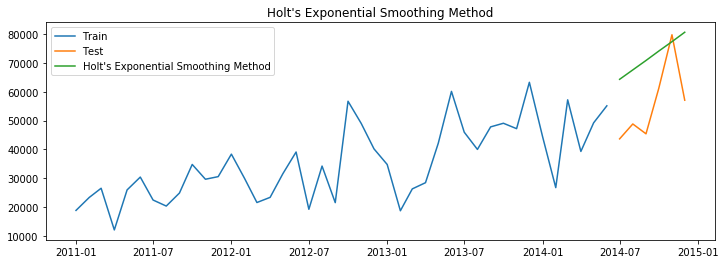

In [21]:
# Plotting train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train.Sales, label = 'Train')
plt.plot(test.Sales, label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'Holt\'s Exponential Smoothing Method')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In the plot above we can see that the forecast a straight line going up, it captures the trend but not the seasonality. It is not able to capture the level quite well.

### Calculation of RMSE and MAPE

In [22]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57


## Holt-Winter's Exponential Smoothing Method (Additive)

In [23]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.0001589669516769991, 'smoothing_slope': 0.0001589634465628399, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30098.128863938822, 'initial_slope': 706.4480227671595, 'initial_seasons': array([ -9376.90367465, -19670.93673497, -12143.17512827, -19934.58098928,
        -9267.46276557,  -1002.58463365, -14271.92730198, -12910.99936781,
       -13416.83029752,   1031.7725666 ,  -4569.49935944,  -2637.79674903]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


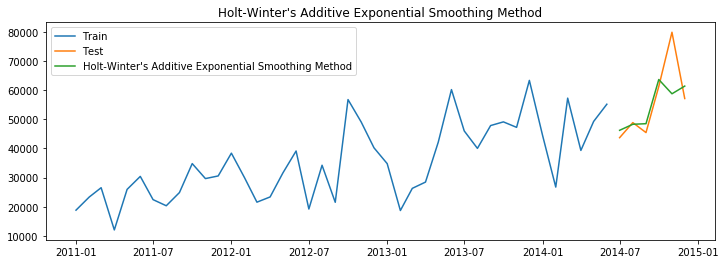

In [24]:
# Plotting train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train.Sales, label = 'Train')
plt.plot(test.Sales, label = 'Test')
plt.plot(y_hat_hwa['hw_forecast'], label = 'Holt-Winter\'s Additive Exponential Smoothing Method')
plt.legend(loc='best')
plt.title('Holt-Winter\'s Additive Exponential Smoothing Method')
plt.show()

The plot shows that the prediction is captured quite precisely along with the trend and the seasonality. The forecast is quite close to the actual sales.

### Calculation of RMSE and MAPE

In [25]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt-Winter\'s Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59


## Holt-Winter's Exponential Smoothing Method (Multiplicative)

In [26]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(test)) 

{'smoothing_level': 2.4246805508010233e-08, 'smoothing_slope': 2.2789607342325968e-08, 'smoothing_seasonal': 7.329220477159925e-08, 'damping_slope': nan, 'initial_level': 34110.96530647067, 'initial_slope': 730.4171503865401, 'initial_seasons': array([0.71585326, 0.48620509, 0.682037  , 0.53147223, 0.73796092,
       0.90143417, 0.62469806, 0.65703816, 0.64896026, 0.93177386,
       0.82774596, 0.88436913]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


E:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


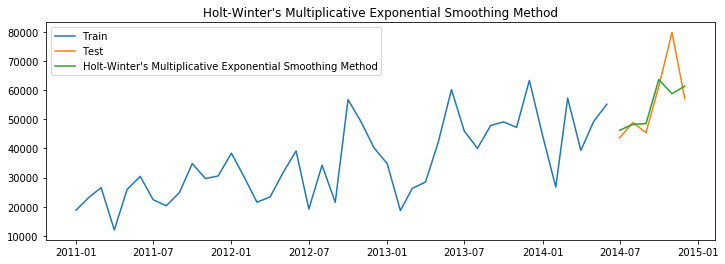

In [27]:
# Plotting train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train.Sales, label = 'Train')
plt.plot(test.Sales, label = 'Test')
plt.plot(y_hat_hwa['hw_forecast'], label = 'Holt-Winter\'s Multiplicative Exponential Smoothing Method')
plt.legend(loc='best')
plt.title('Holt-Winter\'s Multiplicative Exponential Smoothing Method')
plt.show()

This method also shows us that it captures the trend and seasonality quite nicely as we can see the forecast is close to the actual sales.

### Calculation of RMSE and MAPE

In [28]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hwm_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt-Winter\'s Multiplicative Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12


MAPE Value or mean absolute percentage error is a measure of prediction accuracy of any forecasting method. 

- As we can see from the table above, **Holt-Winter's Additive Exponential Smoothing Method** has the least **MAPE value of 8.59**, which means that we would choose this smoothing method over others. 

- From the plots we can see that the forecast from the holt-winter's additive exponential smoothing method is predicting the closest to the actual sales when compared to other forecasting methods. 

- The multiplicative version of the holt-winter's exponential smoothing was the closest but had a MAPE value of 10.12. 

- The lesser the MAPE value the better the forecast. Thus, we choose the **Holt-Winter's Additive Exponential Smoothing Method.**

# Auto Regressive Methods

### Stationarity Checks

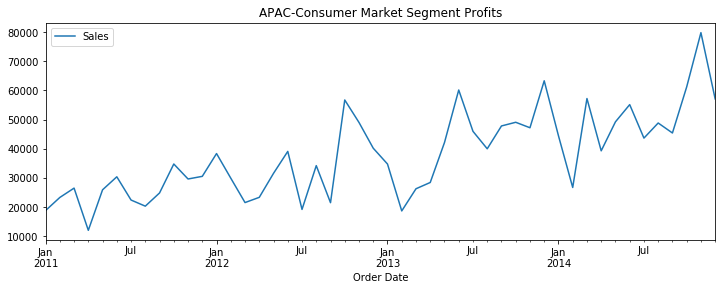

In [29]:
#Plotting time series data
data2.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('APAC-Consumer Market Segment Profits')
plt.show()

> To check for stationarity we must use the ADF test. Stationary processes are easier to analyse and model because their statistical properties remain constant over time.

### Augmented Dickey-Fuller (ADF) Test

In [30]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data2['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


> With a p-value of 0.011804 we reject the null hypothesis, i.e. The time series is not stationary. But we can see from the plot above that there is a slight trend and a bit of variance, therefore, we perform boxcox transformation and Differencing methods to remove trend and variance.

### BoxCox Transformation

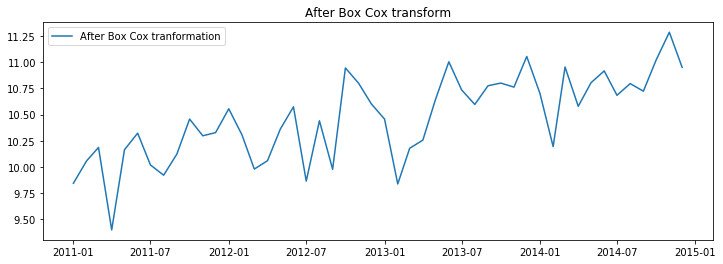

In [31]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data2['Sales'], lmbda=0), index = data2.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing

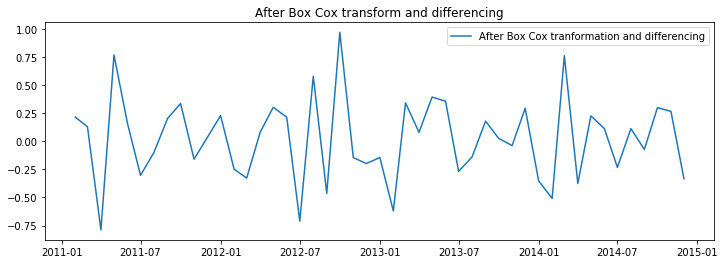

In [32]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data2.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [33]:
data_boxcox_diff.dropna(inplace=True)

In [34]:
# ADF Test
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


> After performing boxcox transformation with lambda=0 and differencing, we performed the ADF test and recieved a p-value of 0.000170. Therefore, we reject the null hypothesis i.e., the time series is not stationary. Also, we saw from the plot that the time series looks stationary. Now that the time series is stationary we can go further and perform our ARIMA methods. 

## Train Test Split

In [35]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regression Method (AR)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [37]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

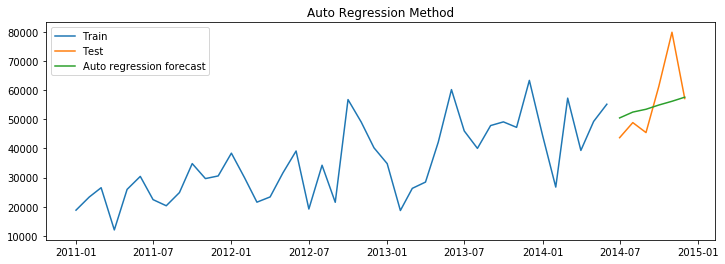

In [38]:
# Plot train test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

This plot shows us that the forecast captures the trend as it is slanted upwards and also the level. However, the seasonality is not captured.

### Calculation of RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12
0,Autoregressive (AR) method,10985.28,13.56


## Moving Average Method (MA)

In [40]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [41]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

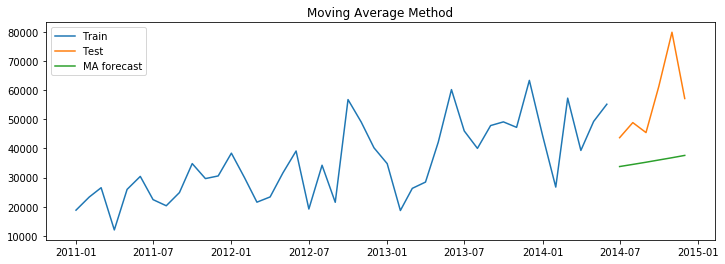

In [42]:
#Plot test, train and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label = 'Train')
plt.plot(test['Sales'], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label = 'MA forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

The plot shows us that the forecast only captures the trend and not the level or seasonality.

In [43]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


## Auto Regression Moving Average Method (ARMA)

In [44]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [45]:
#Recover Original Time Series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

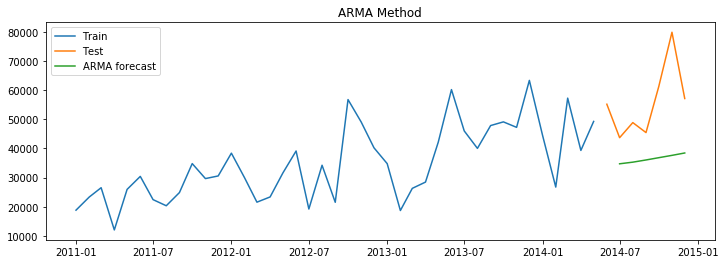

In [46]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( data2['Sales'][:train_len-1], label='Train')
plt.plot(data2['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

This plot shows us that the forecast is predicting the trend only and not the level or seasonality.

In [47]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Auto Regression Integrated Moving Average (ARIMA) Method

In [48]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [49]:
#Recover Original Time series
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

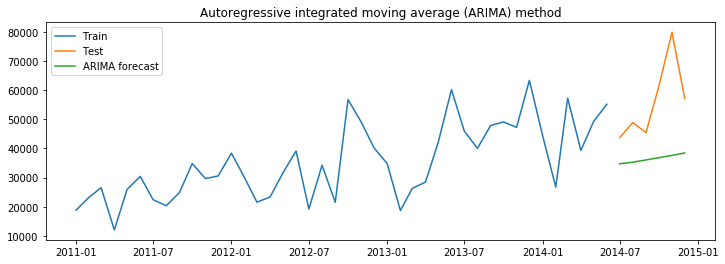

In [50]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

The level predicted is similar to ARMA method, the trend is captured too but not the seasonality.

In [51]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


## Seasonal Auto Regression Integrated Moving Average (SARIMA) Method

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041300
ma.L1      -0.995294
ar.S.L12    0.097618
ma.S.L12   -0.956247
sigma2      0.059138
dtype: float64


In [53]:
# Recover Original Time Series
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

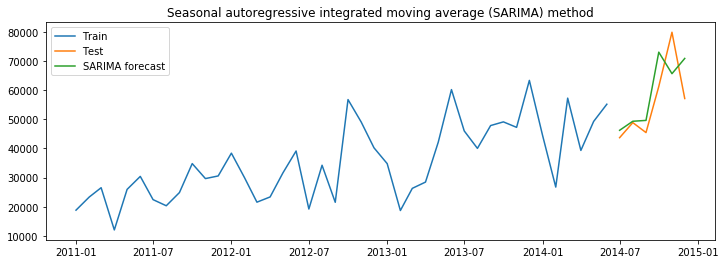

In [54]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

With the help of the seasonal parameters the model predicts the peaks and troughs of the sales. The level, trend and seasonality is captured quite nicely.

In [55]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing method,15011.49,15.99
0,Holt's Exponential Smoothing Method,18976.37,34.57
0,Holt-Winter's Exponential Smoothing Method,8994.00,8.59
0,Holt-Winter's Multiplicative Exponential Smoot...,9976.52,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9609.20,12.85


### Conclusion:

From the above table we are able to compare the MAPE values and we can see that the best ARIMA model is the **SARIMA(1,1,1)(1,1,1,12) model with a MAPE value of 12.85.** The model is able to predict the sales closest to the actual sales. 

In the Exponential Smoothing methods, the **Holt-Winter's Additive Exponential Smoothing Method** was able to predict the sales closest to the actual sales, with the **MAPE value of 8.59.** This method performs best when there is a trend in the time series data and a seasonal effect as well. With the help of decomposition we could see that there is trend and seasonality present in the time series data in the Exponential Smoothing Techniques.

With the help of these parameters SARIMA model is able to take the trend and seasonality into picture and predict the future values accordingly. SARIMA model thus works best when there is trend and seasonality present in the time series data in the ARIMA models.

Therefore, in the Exponential Smoothing methods we choose **Holt-Winter's Additive Smoothing method** and in the ARIMA models we choose the **SARIMA model** for prediction of future sales.